# Assessing the characteristics of interstate relationships in the USA

The State Networks dataset is a compilation of many state-to-state relational variables, including measures of shared borders, travel and trade between states, and demographic characteristics of state populations. The 2,550 units in the dataset are dyadic state-pairs (e.g., Alabama–Alaska, Alabama–Arizona, Alabama–Arkansas, and so on, for each state plus the District of Columbia). The data were collected from multiple sources and incorporate measures of similarity drawn from data in the Correlates of State Policy Project.

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Opening Database

In [2]:
sn=pd.read_csv('/Users/josephthomas/Documents/Projects/State Networks/Data Cleaning/Raw Data/statenetworks.csv')

In [3]:
pd.options.display.max_rows =300

In [4]:
sn.columns

Index(['State1Abbr', 'State2Abbr', 'State1', 'State2', 'dyadid', 'S1region',
       'S2region', 'S1division', 'S2division', 'Border',
       ...
       'S2BlackProt', 'S2Catholic', 'S2Mormon', 'S2Jewish', 'S2Muslim',
       'S2Buddhist', 'S2Hindu', 'S2Nones', 'S2NothingParticular',
       'S2HighlyReligious'],
      dtype='object', length=124)

**Snapshot of data and datatypes**

In [5]:
sn.describe()

Border     Distance   State1_Lat  State1_Long   State2_Lat  \
count  2550.000000  2450.000000  2500.000000  2500.000000  2450.000000   
mean      0.085490  1955.750731    39.450731   -93.465204    39.450730   
std       0.279665  1428.092762     5.728589    18.483460     5.728612   
min       0.000000    56.255615    21.308950  -157.826182    21.308950   
25%       0.000000   958.964600    35.771000  -104.802000    35.771000   
50%       0.000000  1605.739844    39.787096   -89.928686    39.787095   
75%       0.000000  2581.232277    42.733500   -78.638000    42.733500   
max       1.000000  8232.177857    58.301935   -69.765261    58.301940   

       State2_Long  ACS_Migration        PopDif    State1_Pop    State2_Pop  \
count  2450.000000    2550.000000  2.550000e+03  2.550000e+03  2.550000e+03   
mean    -93.465204    2071.576078  0.000000e+00  6.313616e+06  6.313616e+06   
std      18.483536    4063.169711  1.022958e+07  7.162140e+06  7.162140e+06   
min    -157.826200       3.000000 -3.851250e+07  5.734830e+05  5.734830e+05   
25%    -104.802042     234.250000 -3.965876e+06  1.694182e+06  1.694182e+06   
50%     -89.928686     666.000000  0.000000e+00  4.404279e+06  4.404279e+06   
75%     -78.638000    1911.000000  3.965876e+06  7.318811e+06  7.318811e+06   
max     -69.765260   48877.000000  3.851250e+07  3.908598e+07  3.908598e+07   

       ...  S2BlackProt   S2Catholic     S2Mormon     S2Jewish     S2Muslim  \
count  ...  2550.000000  2550.000000  2550.000000  2550.000000  2550.000000   
mean   ...     0.056863     0.190000     0.028431     0.012549     0.006078   
std    ...     0.057320     0.086313     0.079410     0.014933     0.006884   
min    ...     0.000000     0.040000     0.000000     0.000000     0.000000   
25%    ...     0.020000     0.120000     0.010000     0.000000     0.000000   
50%    ...     0.040000     0.180000     0.010000     0.010000     0.010000   
75%    ...     0.080000     0.250000     0.020000     0.020000     0.010000   
max    ...     0.240000     0.420000     0.550000     0.070000     0.030000   

        S2Buddhist      S2Hindu      S2Nones  S2NothingParticular  \
count  2550.000000  2550.000000  2550.000000          2550.000000   
mean      0.007255     0.003725     0.229020             0.161765   
std       0.011731     0.006557     0.055468             0.035415   
min       0.000000     0.000000     0.120000             0.090000   
25%       0.000000     0.000000     0.190000             0.130000   
50%       0.010000     0.000000     0.220000             0.160000   
75%       0.010000     0.010000     0.270000             0.190000   
max       0.080000     0.030000     0.370000             0.240000   

       S2HighlyReligious  
count        2550.000000  
mean            0.546667  
std             0.105343  
min             0.330000  
25%             0.480000  
50%             0.540000  
75%             0.630000  
max             0.770000  

[8 rows x 115 columns]

In [6]:
sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Columns: 124 entries, State1Abbr to S2HighlyReligious
dtypes: float64(90), int64(25), object(9)
memory usage: 2.4+ MB


## Cleaning the Data
Income, IRS Migration and IRS Migration 2020 are not numeral in the original database. Furthermore, Income has dollar signs and commas in its value.

In [7]:
sn.dtypes

State1Abbr                     object
State2Abbr                     object
State1                         object
State2                         object
dyadid                         object
S1region                       object
S2region                       object
S1division                     object
S2division                     object
Border                          int64
Distance                      float64
State1_Lat                    float64
State1_Long                   float64
State2_Lat                    float64
State2_Long                   float64
ACS_Migration                   int64
PopDif                          int64
State1_Pop                      int64
State2_Pop                      int64
IncomingFlights                 int64
IRS_migration                 float64
Income                          int64
IRS_migration_2010            float64
Income_2010                     int64
Imports                       float64
GSPDif                          int64
S1GSP       

**Converting some variables to categorical variables**

In [8]:
sn['S1region']=sn['S1region'].astype('category')
sn['S2region']=sn['S2region'].astype('category')

In [9]:
sn['S1division']=sn['S1division'].astype('category')
sn['S2division']=sn['S2division'].astype('category')

In [10]:
sn.dtypes

State1Abbr                      object
State2Abbr                      object
State1                          object
State2                          object
dyadid                          object
S1region                      category
S2region                      category
S1division                    category
S2division                    category
Border                           int64
Distance                       float64
State1_Lat                     float64
State1_Long                    float64
State2_Lat                     float64
State2_Long                    float64
ACS_Migration                    int64
PopDif                           int64
State1_Pop                       int64
State2_Pop                       int64
IncomingFlights                  int64
IRS_migration                  float64
Income                           int64
IRS_migration_2010             float64
Income_2010                      int64
Imports                        float64
GSPDif                   

**Dealing with missing variables**

In [11]:
sn.isnull().sum()

State1Abbr                      0
State2Abbr                      0
State1                          0
State2                          0
dyadid                          0
S1region                       50
S2region                       50
S1division                     50
S2division                     50
Border                          0
Distance                      100
State1_Lat                     50
State1_Long                    50
State2_Lat                    100
State2_Long                   100
ACS_Migration                   0
PopDif                          0
State1_Pop                      0
State2_Pop                      0
IncomingFlights                 0
IRS_migration                   0
Income                          0
IRS_migration_2010              0
Income_2010                     0
Imports                        10
GSPDif                          0
S1GSP                           0
S2GSP                           0
DemDif                        198
S1AvgDem      

DC has a lot of missing values

In [12]:
sn[sn["State1"]=="District of Columbia"].isnull().sum()

State1Abbr                     0
State2Abbr                     0
State1                         0
State2                         0
dyadid                         0
S1region                      50
S2region                       0
S1division                    50
S2division                     0
Border                         0
Distance                      50
State1_Lat                    50
State1_Long                   50
State2_Lat                    50
State2_Long                   50
ACS_Migration                  0
PopDif                         0
State1_Pop                     0
State2_Pop                     0
IncomingFlights                0
IRS_migration                  0
Income                         0
IRS_migration_2010             0
Income_2010                    0
Imports                        0
GSPDif                         0
S1GSP                          0
S2GSP                          0
DemDif                        50
S1AvgDem                      50
S2AvgDem  

In [13]:
sn=sn.drop(sn.index[sn["State1"]=="District of Columbia"])
sn=sn.drop(sn.index[sn["State2"]=="District of Columbia"])

In [14]:
sn[sn["S1SenDemProp"].isnull()]["State1"].value_counts()

Nebraska    49
Name: State1, dtype: int64

In [15]:
sn[sn["S2SenDemProp"].isnull()]["State2"].value_counts()

Nebraska    49
Name: State2, dtype: int64

The missing values in State Senate Democrat Proportions is due to the unicameral charactristic of Nebraska State Legislation.

_source: https://ballotpedia.org/Nebraska_State_Senate_elections,_2016_

In [16]:
sn["S1SenDemProp"]=sn["S1SenDemProp"].replace([np.nan], 0.244898)

In [17]:
sn["S2SenDemProp"]=sn["S2SenDemProp"].replace([np.nan], 0.244898)

House Proportions

In [18]:
sn[sn["S1HSDemProp"].isnull()]["State1"].value_counts()

Nebraska    49
Name: State1, dtype: int64

In [19]:
sn[sn["S2HSDemProp"].isnull()]["State2"].value_counts()

Nebraska    49
Name: State2, dtype: int64

Since the state of Nebraska only has a unicameral parliament, its single house acts as both the House and Senate. Hence, the proportion of democrats remain the same for both houses.

In [20]:
sn["S1HSDemProp"]=sn["S1HSDemProp"].replace([np.nan], 0.2448)

In [21]:
sn["S2HSDemProp"]=sn["S2HSDemProp"].replace([np.nan], 0.2448)

Transforming the remaining political variables including this filled information

In [22]:
sn["S1AvgDem"]=(sn["S1SenDemProp"]+sn["S1HSDemProp"])/2
sn["S2AvgDem"]=(sn["S2SenDemProp"]+sn["S2HSDemProp"])/2
sn["DemDif"]=sn["S1AvgDem"]-sn["S2AvgDem"]

In [23]:
sn[sn["State1PolSocLib"].isnull()]["State1"].value_counts()

Series([], Name: State1, dtype: int64)

In [24]:
sn["S1EconomicLiberalism S1SocialLiberalism State1PolSocLib State1PolEconLib State1MassSocLib State1MassEconLib".split()].corr()

S1EconomicLiberalism  S1SocialLiberalism  \
S1EconomicLiberalism              1.000000            0.524754   
S1SocialLiberalism                0.524754            1.000000   
State1PolSocLib                   0.539506            0.813092   
State1PolEconLib                  0.743863            0.721870   
State1MassSocLib                  0.544327            0.937802   
State1MassEconLib                 0.766882            0.650152   

                      State1PolSocLib  State1PolEconLib  State1MassSocLib  \
S1EconomicLiberalism         0.539506          0.743863          0.544327   
S1SocialLiberalism           0.813092          0.721870          0.937802   
State1PolSocLib              1.000000          0.855289          0.829498   
State1PolEconLib             0.855289          1.000000          0.770443   
State1MassSocLib             0.829498          0.770443          1.000000   
State1MassEconLib            0.705518          0.779512          0.718845   

                      State1MassEconLib  
S1EconomicLiberalism           0.766882  
S1SocialLiberalism             0.650152  
State1PolSocLib                0.705518  
State1PolEconLib               0.779512  
State1MassSocLib               0.718845  
State1MassEconLib              1.000000

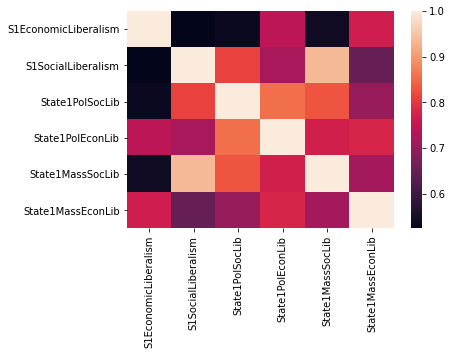

In [25]:
sns.heatmap(sn["S1EconomicLiberalism S1SocialLiberalism State1PolSocLib State1PolEconLib State1MassSocLib State1MassEconLib".split()].corr())

In [26]:
sn["S2EconomicLiberalism S2SocialLiberalism State2PolSocLib State2PolEconLib State2MassSocLib State2MassEconLib".split()].corr()

S2EconomicLiberalism  S2SocialLiberalism  \
S2EconomicLiberalism              1.000000            0.524754   
S2SocialLiberalism                0.524754            1.000000   
State2PolSocLib                   0.376421            0.470277   
State2PolEconLib                  0.411133            0.316468   
State2MassSocLib                  0.400708            0.448039   
State2MassEconLib                 0.407224            0.321976   

                      State2PolSocLib  State2PolEconLib  State2MassSocLib  \
S2EconomicLiberalism         0.376421          0.411133          0.400708   
S2SocialLiberalism           0.470277          0.316468          0.448039   
State2PolSocLib              1.000000          0.853185          0.832803   
State2PolEconLib             0.853185          1.000000          0.774691   
State2MassSocLib             0.832803          0.774691          1.000000   
State2MassEconLib            0.702613          0.777513          0.720087   

                      State2MassEconLib  
S2EconomicLiberalism           0.407224  
S2SocialLiberalism             0.321976  
State2PolSocLib                0.702613  
State2PolEconLib               0.777513  
State2MassSocLib               0.720087  
State2MassEconLib              1.000000

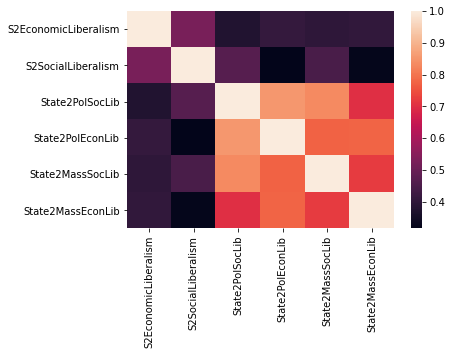

In [27]:
sns.heatmap(sn["S2EconomicLiberalism S2SocialLiberalism State2PolSocLib State2PolEconLib State2MassSocLib State2MassEconLib".split()].corr())

There is strong correlation between the aggregated and disaggregated liberalism score indices with a disproportionately large number of missing values in the aggregated indices. This is sufficient cause to drop the aggregated liberalism indices and fix missing value issues in the disaggregated liberalism scores.

In [28]:
delpsl=sn[sn["State1"]=="Delaware"]["State1PolSocLib"].head(1).item()
delpel=sn[sn["State1"]=="Delaware"]["State1PolEconLib"].head(1).item()
delmsl=sn[sn["State1"]=="Delaware"]["State1MassSocLib"].head(1).item()
delmel=sn[sn["State1"]=="Delaware"]["State1MassEconLib"].head(1).item()

In [29]:
sn["State2PolSocLib"]=sn["State2PolSocLib"].replace(np.nan,delpsl)
sn["State2PolEconLib"]=sn["State2PolEconLib"].replace(np.nan,delpel)
sn["State2MassSocLib"]=sn["State2MassSocLib"].replace(np.nan,delmsl)
sn["State2MassEconLib"]=sn["State2MassEconLib"].replace(np.nan,delmel)

In [30]:
sn["PolSocLibDif"]=sn["State1PolSocLib"]-sn["State2PolSocLib"]
sn["PolEconLibDif"]=sn["State1PolEconLib"]-sn["State2PolEconLib"]
sn["MassSocLibDif"]=sn["State1MassSocLib"]-sn["State2MassSocLib"]
sn["MassEconLibDif"]=sn["State1MassEconLib"]-sn["State2MassEconLib"]

In [31]:
to_drop = "State1Abbr State2Abbr State1 State2 LibDif ELibDif SLibDif S1EconomicLiberalism S1SocialLiberalism S2EconomicLiberalism S2SocialLiberalism".split()

In [32]:
sn=sn.drop(to_drop, axis=1)

In [33]:
sn.isnull().sum()

dyadid                        0
S1region                      0
S2region                      0
S1division                    0
S2division                    0
Border                        0
Distance                      0
State1_Lat                    0
State1_Long                   0
State2_Lat                    0
State2_Long                   0
ACS_Migration                 0
PopDif                        0
State1_Pop                    0
State2_Pop                    0
IncomingFlights               0
IRS_migration                 0
Income                        0
IRS_migration_2010            0
Income_2010                   0
Imports                       1
GSPDif                        0
S1GSP                         0
S2GSP                         0
DemDif                        0
S1AvgDem                      0
S2AvgDem                      0
S1SenDemProp                  0
S1HSDemProp                   0
S2SenDemProp                  0
S2HSDemProp                   0
Ideology

In [44]:
sn["SameRegion"]= (sn["S1region"]==sn["S2region"]).astype(int)
sn["SameDivision"]= (sn["S1division"]==sn["S2division"]).astype(int)

In [46]:
varlist="dyadid S1region S2region SameRegion S1division S2division SameDivision Border Distance PopDif ACS_Migration State1_Pop State2_Pop IncomingFlights IRS_migration IRS_migration_2010 Income Income_2010 Imports GSPDif S1GSP S2GSP DemDif S1AvgDem S2AvgDem S1SenDemProp S1HSDemProp S2SenDemProp S2HSDemProp IdeologyDif PIDDif S1Ideology S1PID S2Ideology S2PID policy_diffusion_tie policy_diffusion_2015 policy_diffusion_2000.2015 MassSocLibDif MassEconLibDif PolSocLibDif PolEconLibDif State1PolSocLib State1PolEconLib State1MassSocLib State1MassEconLib State2PolSocLib State2PolEconLib State2MassSocLib State2MassEconLib perceived_similarity fb_friend_index RaceDif LatinoDif WhiteDif BlackDif AsianDif NativeDif S1Latino S1White S1Black S1Asian S1Native S2Latino S2White S2Black S2Asian S2Native ReligDif ChristianDif JewishDif MuslimDif BuddhistDif HinduDif NonesDif NPDif S1Christian S1Jewish S1Muslim S1Buddhist S1Hindu S1Nones S1NothingParticular S1HighlyReligious S2Christian S2Jewish S2Muslim S2Buddhist S2Hindu S2Nones S2NothingParticular S2HighlyReligious".split()

## Data Analysis and Visualization

In [47]:
sns.set_context("notebook")
color = sns.color_palette("twilight")

Analysing relevance of location variables for interstate relations

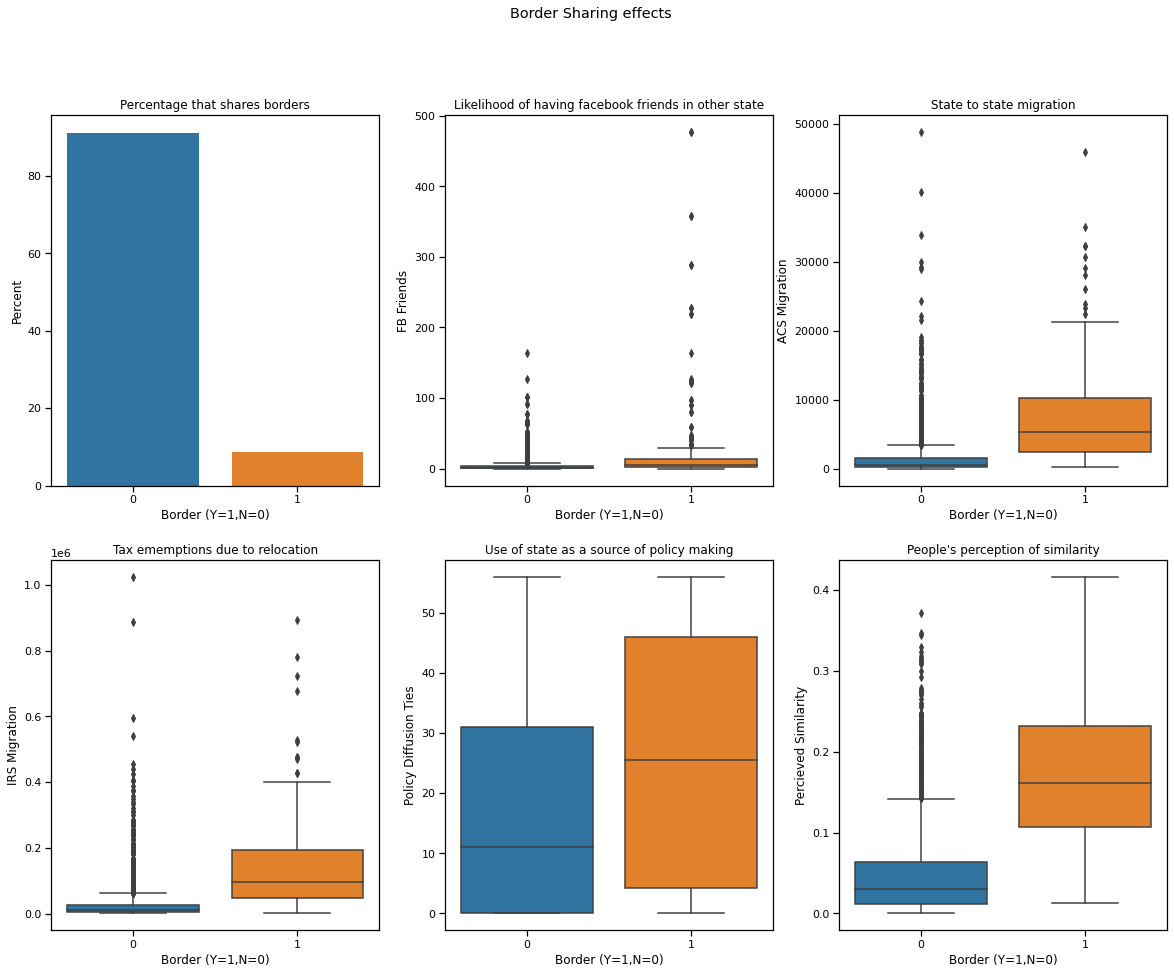

In [48]:
f1, ax = plt.subplots(2,3, figsize=(20,15))
f1.suptitle("Border Sharing effects")
sns.barplot(x='Border', y='Border',data=sn,estimator=lambda x: len(x) / len(sn) * 100, ax=ax[0,0])
ax[0,0].set(ylabel="Percent", xlabel = "Border (Y=1,N=0)", title = 'Percentage that shares borders')
sns.boxplot(x='Border', y='fb_friend_index',data=sn, ax=ax[0,1])
ax[0,1].set(ylabel="FB Friends", xlabel = "Border (Y=1,N=0)", title = 'Likelihood of having facebook friends in other state')
sns.boxplot(x='Border', y='ACS_Migration',data=sn, ax=ax[0,2])
ax[0,2].set(ylabel="ACS Migration", xlabel = "Border (Y=1,N=0)", title = 'State to state migration')
sns.boxplot(x='Border', y='IRS_migration',data=sn, ax=ax[1,0])
ax[1,0].set(ylabel="IRS Migration", xlabel = "Border (Y=1,N=0)", title = 'Tax ememptions due to relocation')
sns.boxplot(x='Border', y='policy_diffusion_tie',data=sn, ax=ax[1,1])
ax[1,1].set(ylabel="Policy Diffusion Ties", xlabel = "Border (Y=1,N=0)", title = 'Use of state as a source of policy making')
sns.boxplot(x='Border', y='perceived_similarity',data=sn, ax=ax[1,2])
ax[1,2].set(ylabel="Percieved Similarity", xlabel = "Border (Y=1,N=0)", title = "People's perception of similarity")
f1.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data Cleaning/Out/f11Border.png')

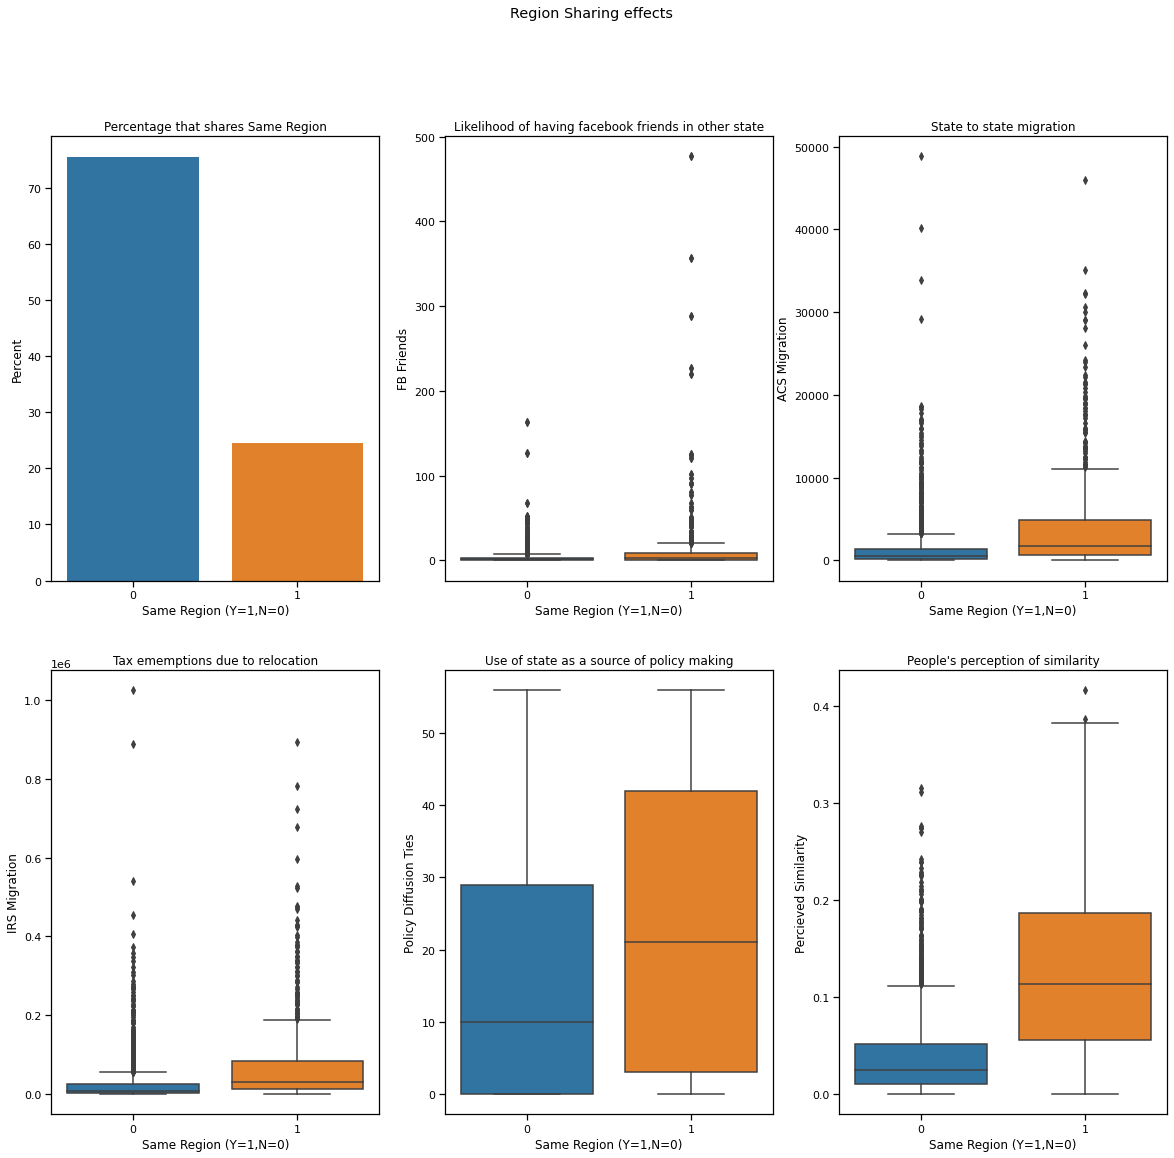

In [49]:
f12, ax = plt.subplots(2,3, figsize=(20,18))
f12.suptitle("Region Sharing effects")
sns.barplot(x='SameRegion', y='SameRegion',data=sn,estimator=lambda x: len(x) / len(sn) * 100, ax=ax[0,0])
ax[0,0].set(ylabel="Percent", xlabel = "Same Region (Y=1,N=0)", title = 'Percentage that shares Same Region')
sns.boxplot(x='SameRegion', y='fb_friend_index',data=sn, ax=ax[0,1])
ax[0,1].set(ylabel="FB Friends", xlabel = "Same Region (Y=1,N=0)", title = 'Likelihood of having facebook friends in other state')
sns.boxplot(x='SameRegion', y='ACS_Migration',data=sn, ax=ax[0,2])
ax[0,2].set(ylabel="ACS Migration", xlabel = "Same Region (Y=1,N=0)", title = 'State to state migration')
sns.boxplot(x='SameRegion', y='IRS_migration',data=sn, ax=ax[1,0])
ax[1,0].set(ylabel="IRS Migration", xlabel = "Same Region (Y=1,N=0)", title = 'Tax ememptions due to relocation')
sns.boxplot(x='SameRegion', y='policy_diffusion_tie',data=sn, ax=ax[1,1])
ax[1,1].set(ylabel="Policy Diffusion Ties", xlabel = "Same Region (Y=1,N=0)", title = 'Use of state as a source of policy making')
sns.boxplot(x='SameRegion', y='perceived_similarity',data=sn, ax=ax[1,2])
ax[1,2].set(ylabel="Percieved Similarity", xlabel = "Same Region (Y=1,N=0)", title = "People's perception of similarity")
f12.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data Cleaning/Out/f12Region.png')

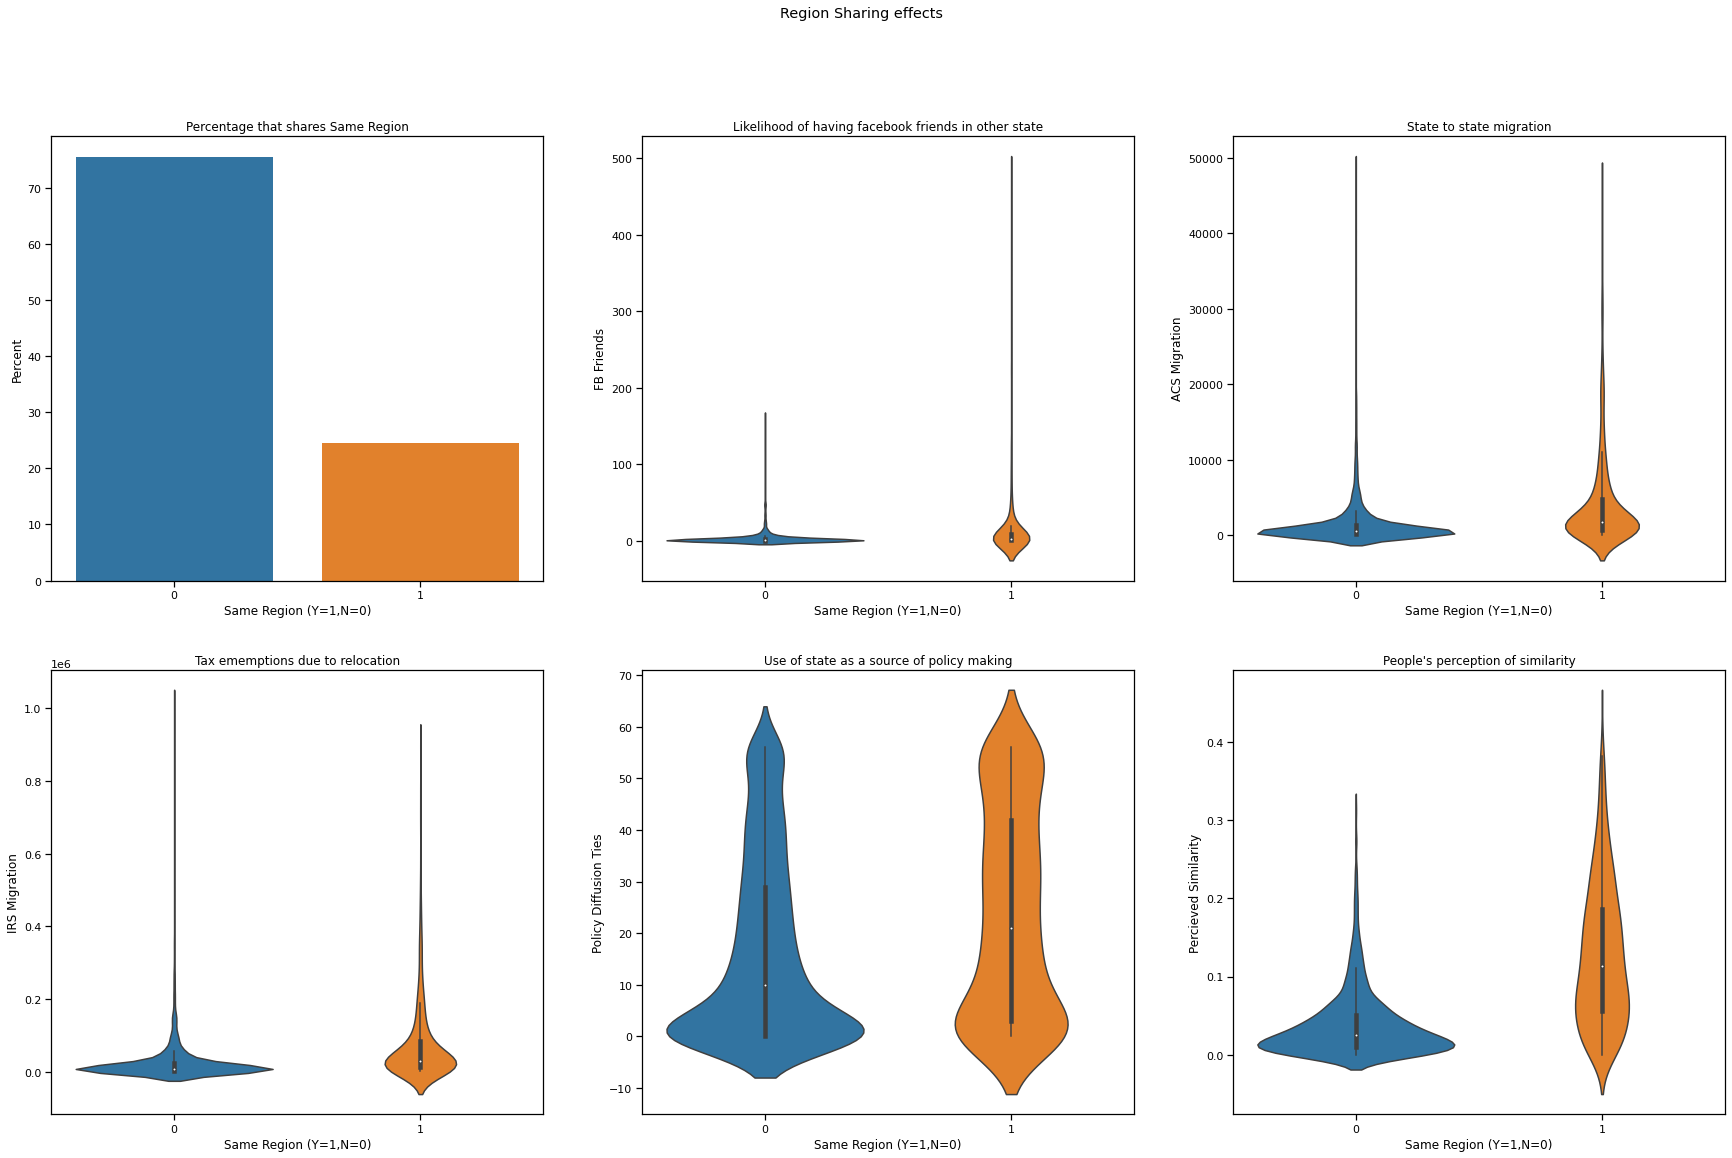

In [50]:
f12, ax = plt.subplots(2,3, figsize=(30,18))
f12.suptitle("Region Sharing effects")
sns.barplot(x='SameRegion', y='SameRegion',data=sn,estimator=lambda x: len(x) / len(sn) * 100, ax=ax[0,0])
ax[0,0].set(ylabel="Percent", xlabel = "Same Region (Y=1,N=0)", title = 'Percentage that shares Same Region')
sns.violinplot(x='SameRegion', y='fb_friend_index',data=sn, ax=ax[0,1])
ax[0,1].set(ylabel="FB Friends", xlabel = "Same Region (Y=1,N=0)", title = 'Likelihood of having facebook friends in other state')
sns.violinplot(x='SameRegion', y='ACS_Migration',data=sn, ax=ax[0,2])
ax[0,2].set(ylabel="ACS Migration", xlabel = "Same Region (Y=1,N=0)", title = 'State to state migration')
sns.violinplot(x='SameRegion', y='IRS_migration',data=sn, ax=ax[1,0])
ax[1,0].set(ylabel="IRS Migration", xlabel = "Same Region (Y=1,N=0)", title = 'Tax ememptions due to relocation')
sns.violinplot(x='SameRegion', y='policy_diffusion_tie',data=sn, ax=ax[1,1])
ax[1,1].set(ylabel="Policy Diffusion Ties", xlabel = "Same Region (Y=1,N=0)", title = 'Use of state as a source of policy making')
sns.violinplot(x='SameRegion', y='perceived_similarity',data=sn, ax=ax[1,2])
ax[1,2].set(ylabel="Percieved Similarity", xlabel = "Same Region (Y=1,N=0)", title = "People's perception of similarity")
f12.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data Cleaning/Out/f12RegionV.png')

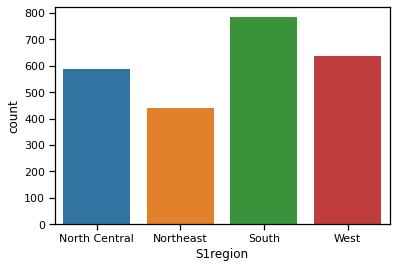

In [51]:
f13=plt.figure()
ax=f13.add_subplot(1,1,1)
sns.countplot(x='S1region',data=sn, ax=ax)

In [52]:
sn.loc[sn["fb_friend_index"]>100][["dyadid", "Border","fb_friend_index"]].sort_values("fb_friend_index", ascending=False).head(20)

dyadid  Border  fb_friend_index
1088  MA-RI       1       477.231479
1971  RI-MA       1       477.226914
320   CT-MA       1       357.477431
1056  MA-CT       1       357.476156
1471  NH-MA       1       288.802925
1078  MA-NH       1       288.802196
369   DE-MD       1       227.215311
1007  MD-DE       1       227.214479
338   CT-RI       1       219.592312
1956  RI-CT       1       219.590638
379   DE-NJ       1       163.679484
1507  NJ-DE       0       163.678532
387   DE-PA       1       126.376590
1907  PA-DE       0       126.376366
1531  NJ-NY       1       125.670134
1630  NY-NJ       1       125.669865
331   CT-NY       1       124.215045
1606  NY-CT       1       124.214789
202   CA-AZ       1       120.996260
103   AZ-CA       1       120.996071

In [53]:
sn.loc[sn["Border"]==0][["dyadid", "Border","fb_friend_index", "Distance"]].sort_values("fb_friend_index", ascending=False).head(20)

dyadid  Border  fb_friend_index     Distance
1507  NJ-DE       0       163.678532   135.188520
1907  PA-DE       0       126.376366   168.963936
554   HI-CA       0       101.926517  3961.703995
210   CA-HI       0       101.924646  3961.703995
1506  NJ-CT       0        91.456711   245.152192
329   CT-NJ       0        91.456518   245.152192
1079  MA-NJ       0        76.857619   384.238107
1521  NJ-MA       0        76.857534   384.238107
970   ME-MA       0        68.193150   253.975023
1069  MA-ME       0        68.191754   253.975023
220   CA-MA       0        67.389991  4233.479669
1054  MA-CA       0        67.389828  4233.479669
1411  NV-HI       0        63.471006  4123.900188
577   HI-NV       0        63.466796  4123.900188
328   CT-NH       0        63.440250   186.371750
1456  NH-CT       0        63.440125   186.371750
356   DE-CT       0        52.268228   377.243137
306   CT-DE       0        52.267395   377.243137
1488  NH-RI       0        51.799250   155.811159
1979  RI-NH       0        51.799200   155.811159

Looking at FB Friends Across shared borders out of the states having friends in other states, New England states take the top 8/10 spots having friends in other NE states. The other two spots are occupied by Maryland and Delaware and vice versa.  And 18 of top 20 states share their border.

MA and CA, NV and HI, HI and CA have fb friends in each other, not sharing borders and distance greater than 4000 miles.

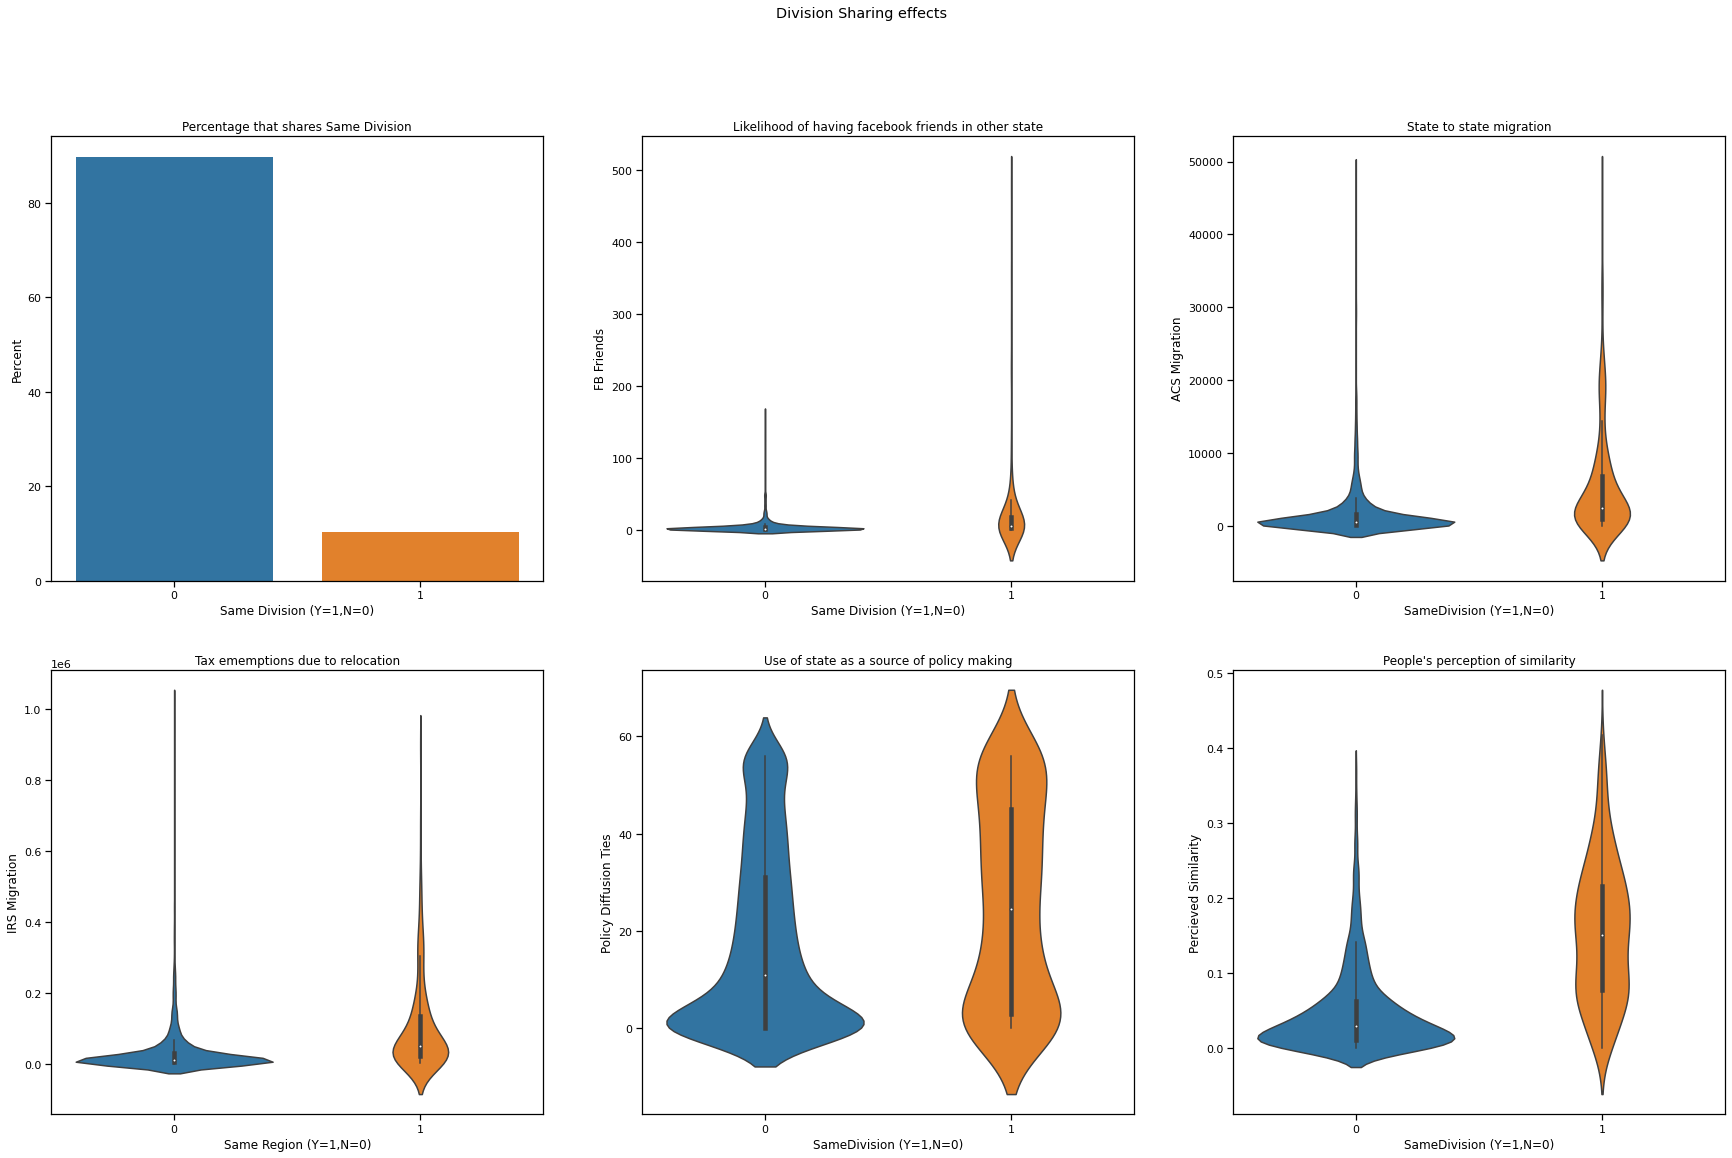

In [54]:
f14, ax = plt.subplots(2,3, figsize=(30,18))
f14.suptitle("Division Sharing effects")
sns.barplot(x='SameDivision', y='SameDivision',data=sn,estimator=lambda x: len(x) / len(sn) * 100, ax=ax[0,0])
ax[0,0].set(ylabel="Percent", xlabel = "Same Division (Y=1,N=0)", title = 'Percentage that shares Same Division')
sns.violinplot(x='SameDivision', y='fb_friend_index',data=sn, ax=ax[0,1])
ax[0,1].set(ylabel="FB Friends", xlabel = "Same Division (Y=1,N=0)", title = 'Likelihood of having facebook friends in other state')
sns.violinplot(x='SameDivision', y='ACS_Migration',data=sn, ax=ax[0,2])
ax[0,2].set(ylabel="ACS Migration", xlabel = "SameDivision (Y=1,N=0)", title = 'State to state migration')
sns.violinplot(x='SameDivision', y='IRS_migration',data=sn, ax=ax[1,0])
ax[1,0].set(ylabel="IRS Migration", xlabel = "Same Region (Y=1,N=0)", title = 'Tax ememptions due to relocation')
sns.violinplot(x='SameDivision', y='policy_diffusion_tie',data=sn, ax=ax[1,1])
ax[1,1].set(ylabel="Policy Diffusion Ties", xlabel = "SameDivision (Y=1,N=0)", title = 'Use of state as a source of policy making')
sns.violinplot(x='SameDivision', y='perceived_similarity',data=sn, ax=ax[1,2])
ax[1,2].set(ylabel="Percieved Similarity", xlabel = "SameDivision (Y=1,N=0)", title = "People's perception of similarity")
f14.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data Cleaning/Out/f14DivisionV.png')

Location Variables done

Economy Varibles

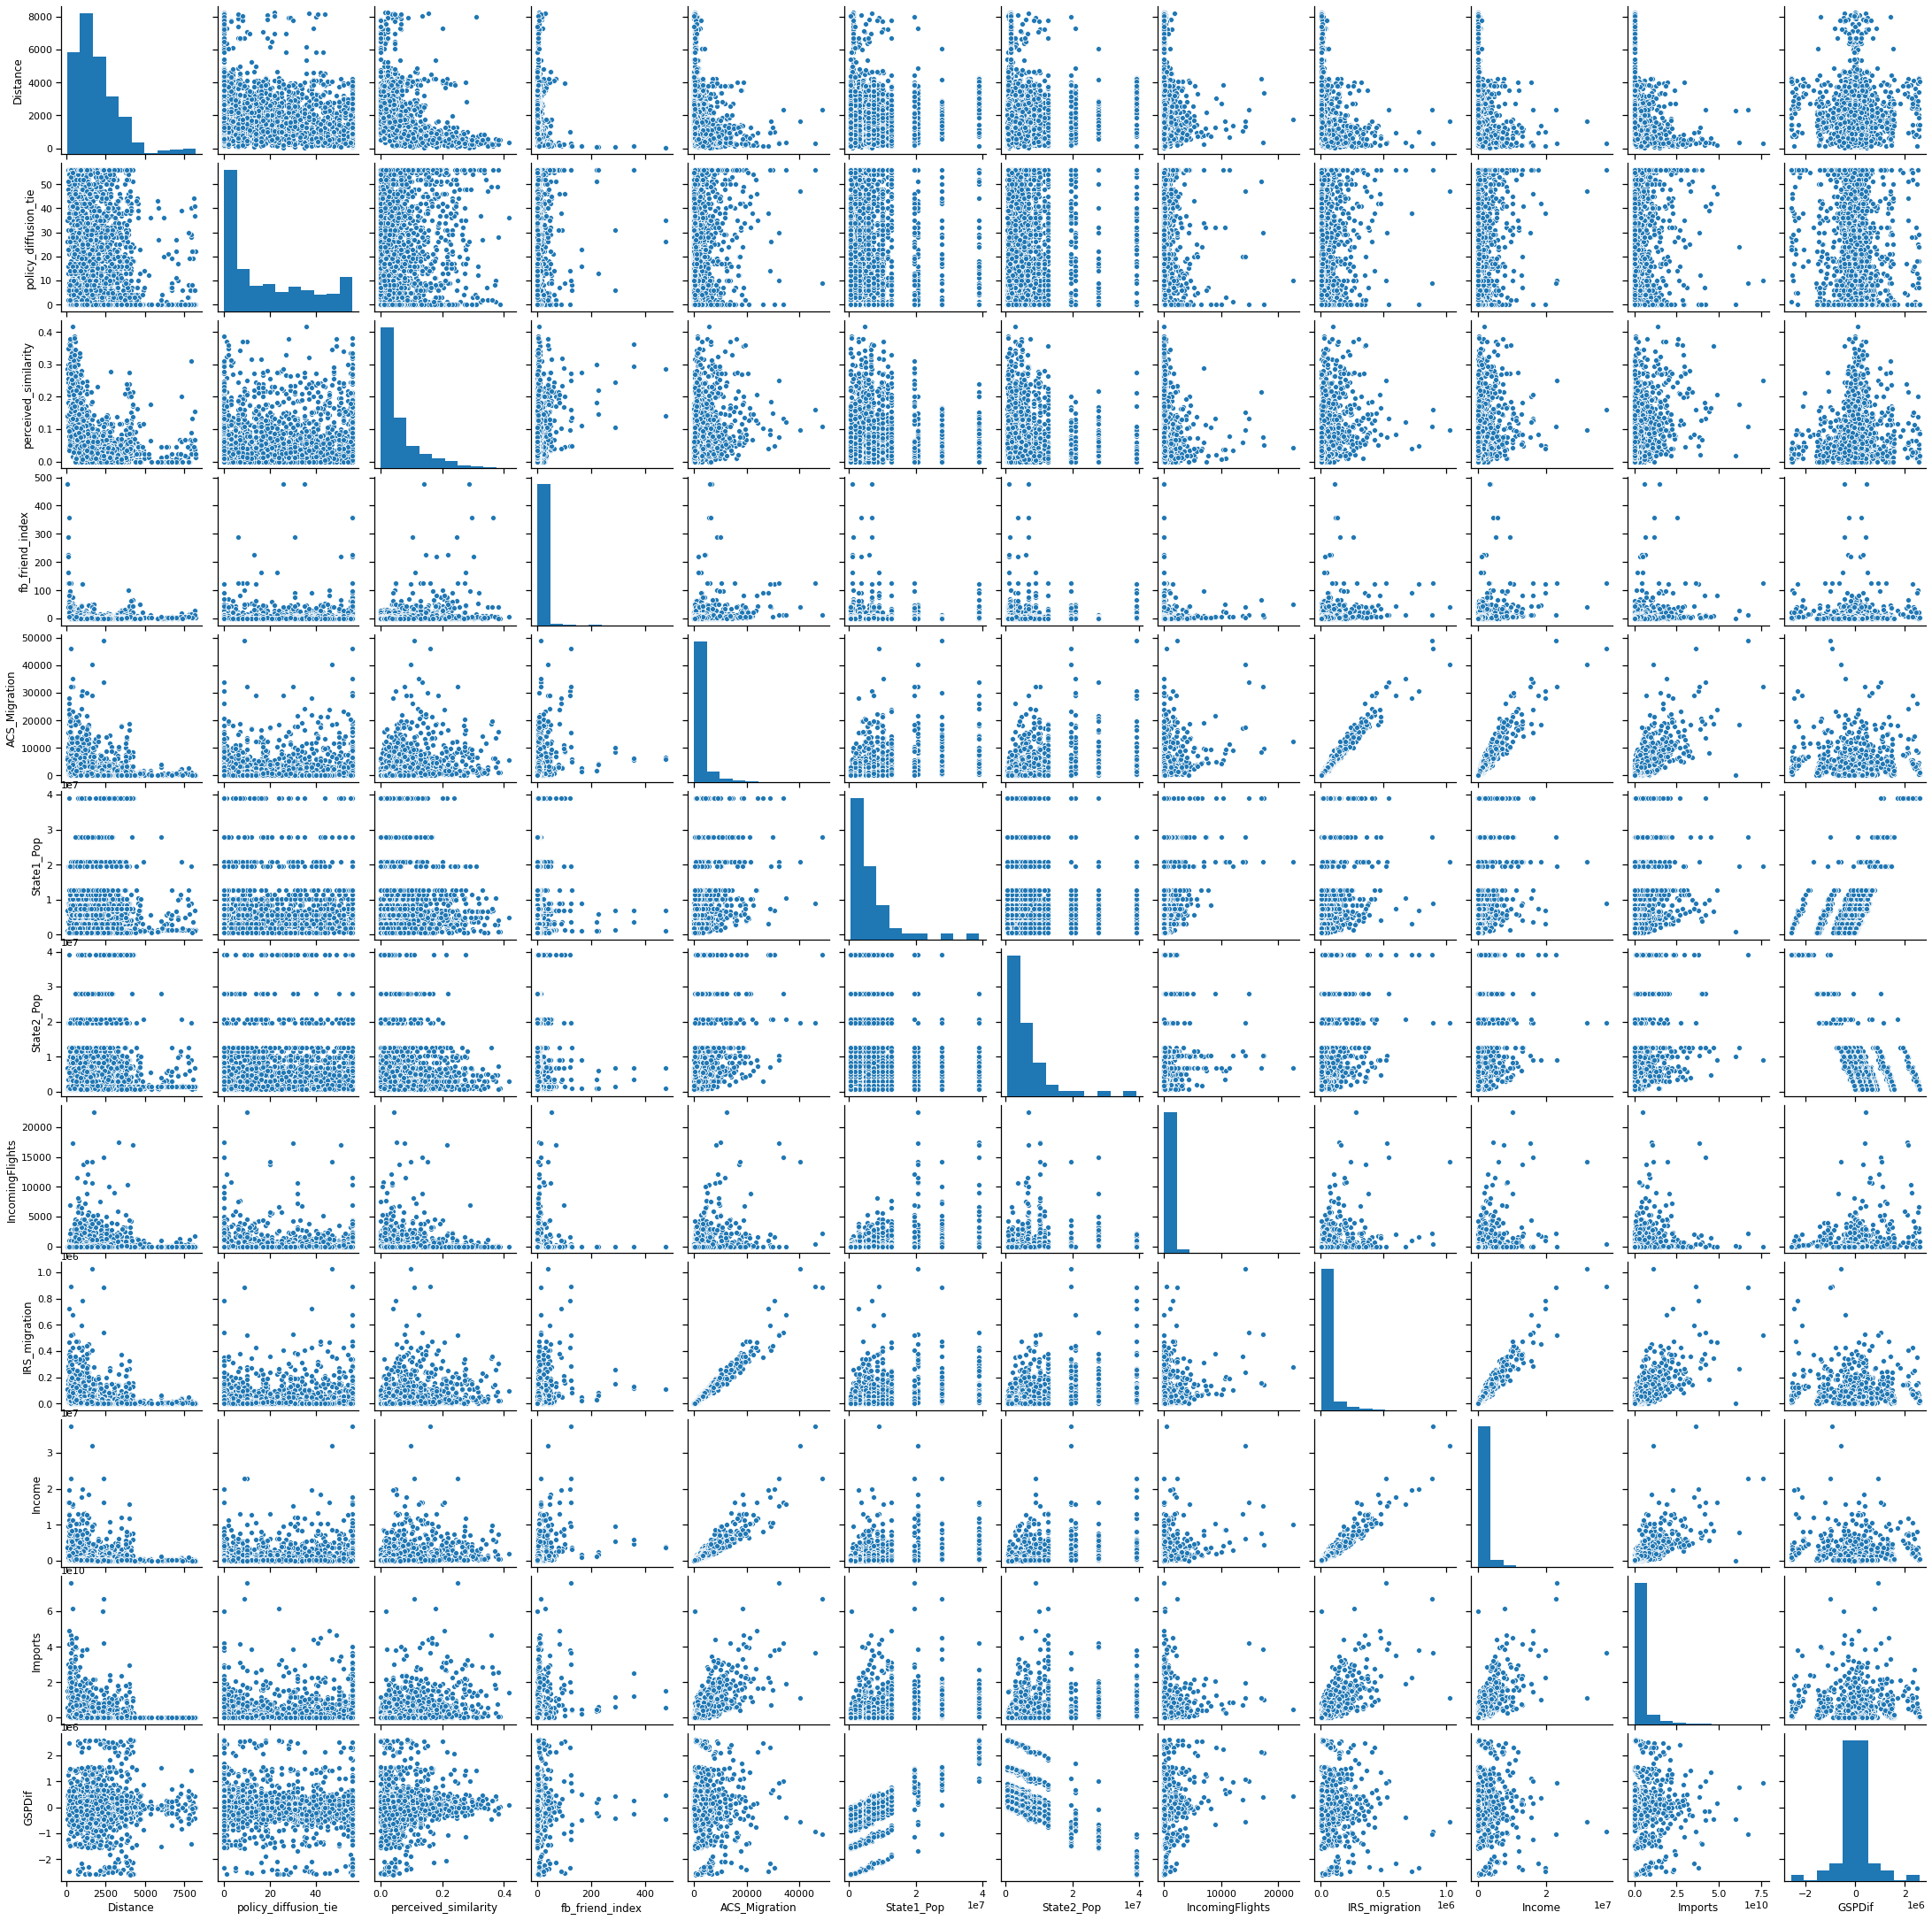

In [56]:
f21=sns.pairplot(sn["Distance policy_diffusion_tie perceived_similarity fb_friend_index ACS_Migration State1_Pop State2_Pop IncomingFlights IRS_migration Income Imports GSPDif".split()])

In [58]:
f21.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data Cleaning/Out/f21econpairplot.png')

Selecting out variables that show some kind of relationships

<Figure size 720x720 with 0 Axes>

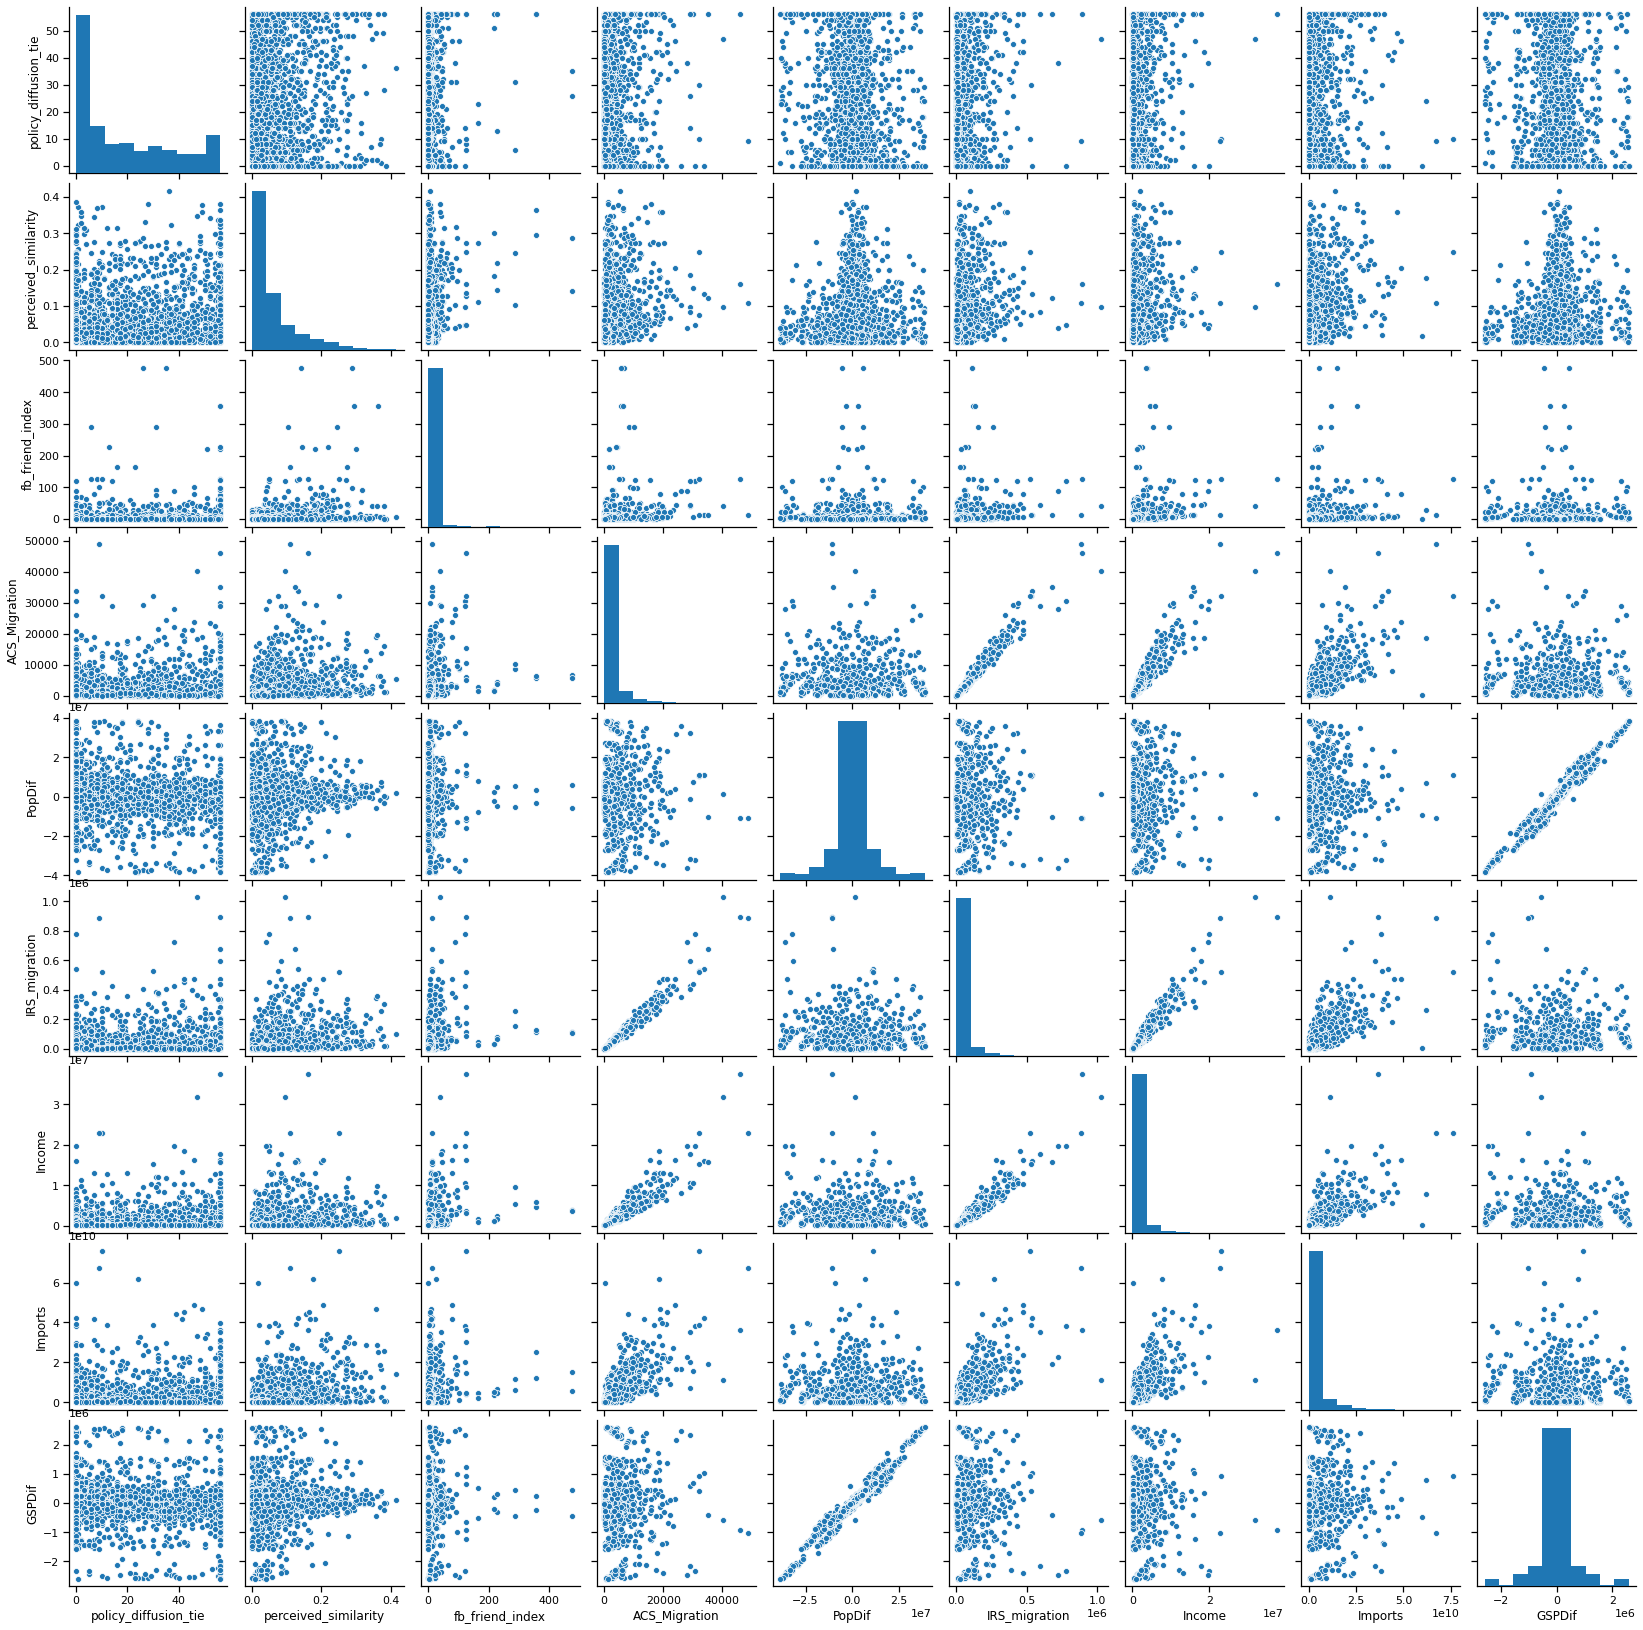

In [59]:
plt.figure(figsize=(10,10))
f2_2=sns.pairplot(sn["policy_diffusion_tie perceived_similarity fb_friend_index ACS_Migration PopDif IRS_migration Income Imports GSPDif".split()])
f2_2.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data Cleaning/Out/f22econpairplot.png')

Mention observed relationships here - What warrant further investigation

`## Income relations

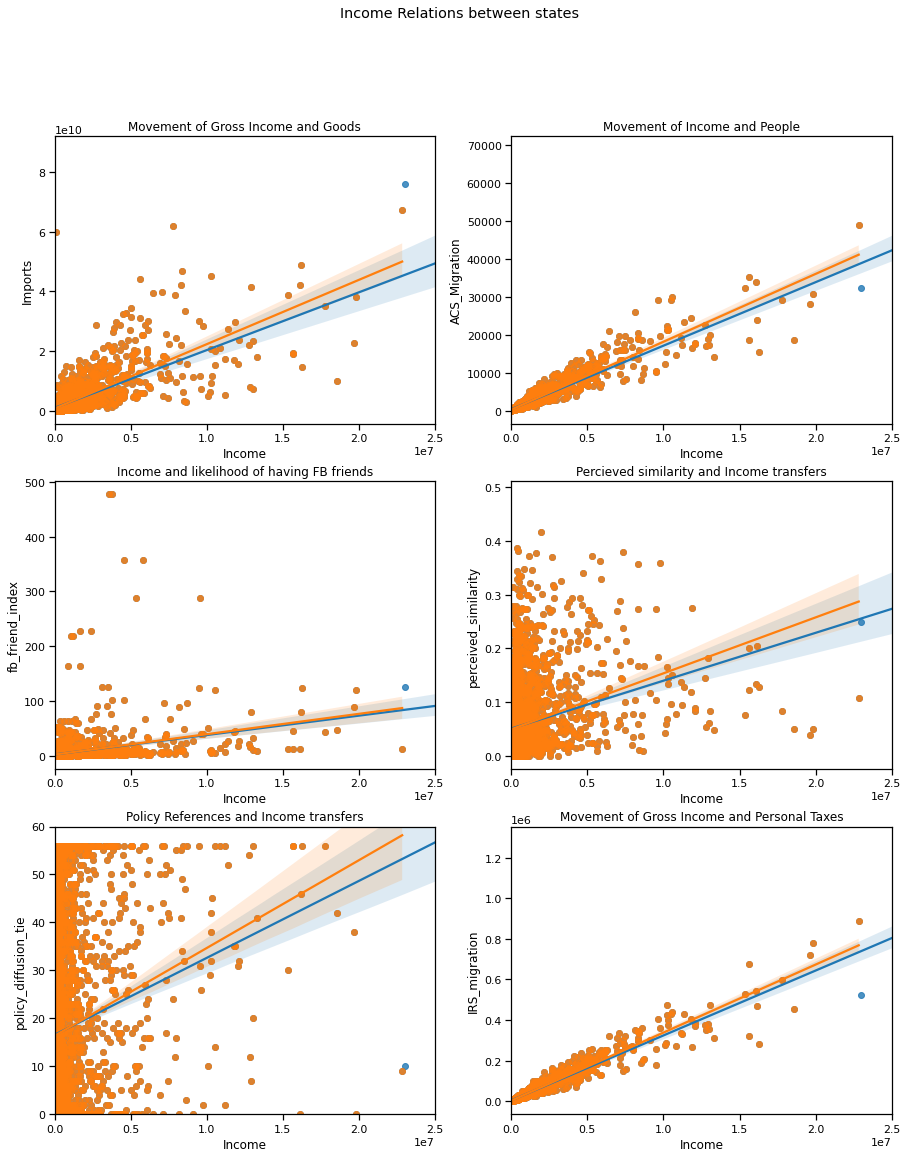

In [130]:
f23, axes = plt.subplots(3, 2, figsize=(15,18))
f23.suptitle("Income Relations between states")

xlim = [0,25000000]
for ax in axes.flat:
    ax.set_xlim(xlim)

sns.regplot(x='Income',y='Imports', data=sn, ax=axes[0,0])
axes[0,0].set(ylabel="Imports from state to state", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Goods')
sns.regplot(x='Income',y='ACS_Migration', data=sn, ax=axes[0,1])
axes[0,1].set(ylabel="ACS Migration", xlabel = "Income moved from State to state", title = 'Movement of Income and People')
sns.regplot(x='Income',y='fb_friend_index', data=sn, ax=axes[1,0])
axes[1,0].set(ylabel="FB Friends", xlabel = "Income moved from State to state", title = 'Income and likelihood of having FB friends')
sns.regplot(x='Income',y='IRS_migration', data=sn, ax=axes[2,1])
axes[2,1].set(ylabel="Movt of Tax", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Personal Taxes')
sns.regplot(x='Income',y='policy_diffusion_tie', data=sn, ax=axes[2,0])
axes[2,0].set(ylabel="Policy references", xlabel = "Income moved from State to state", title = 'Policy References and Income transfers')
sns.regplot(x='Income',y='perceived_similarity', data=sn, ax=axes[1,1])
axes[1,1].set(ylabel="Percieved similarity", xlabel = "Income moved from State to state", title = 'Percieved similarity and Income transfers')
axes[2,0].set_ylim([0,60])
sns.regplot(x='Income',y='Imports', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[0,0])
#axes[0,0].set(ylabel="Imports from state to state", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Goods')
sns.regplot(x='Income',y='ACS_Migration', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[0,1])
#axes[0,1].set(ylabel="Percent", xlabel = "Income moved from State to state", title = 'Movement of Income and People')
sns.regplot(x='Income',y='fb_friend_index', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[1,0])
#axes[1,0].set(ylabel="FB Friends", xlabel = "Income moved from State to state", title = 'Income and likelihood of having FB friends')
sns.regplot(x='Income',y='IRS_migration', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[2,1])
#axes[2,1].set(ylabel="Movt of Tax", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Personal Taxes')
sns.regplot(x='Income',y='policy_diffusion_tie', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[2,0])
#axes[2,0].set(ylabel="Policy references", xlabel = "Income moved from State to state", title = 'Policy References and Income transfers')
sns.regplot(x='Income',y='perceived_similarity', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[1,1])
#axes[1,1].set(ylabel="Percieved similarity", xlabel = "Income moved from State to state", title = 'Percieved similarity and Income transfers')


f23.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data Cleaning/Out/f23Incomelmplot.png')

In [120]:
c=float(input("Quantile of Observations to consider (0,1) ") or "0.99")

Quantile of Observations to consider (0,1) .999


f24, axes = plt.subplots(3, 2, figsize=(15,18))
f24.suptitle("Income Relations between states excluding large outliers (Only {} percent of data considered)".format(c*100))
sns.regplot(x='Income',y='Imports', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[0,0])
axes[0,0].set(ylabel="Imports from state to state", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Goods')
sns.regplot(x='Income',y='ACS_Migration', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[0,1])
axes[0,1].set(ylabel="Percent", xlabel = "Income moved from State to state", title = 'Movement of Income and People')
sns.regplot(x='Income',y='fb_friend_index', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[1,0])
axes[1,0].set(ylabel="FB Friends", xlabel = "Income moved from State to state", title = 'Income and likelihood of having FB friends')
sns.regplot(x='Income',y='IRS_migration', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[2,1])
axes[2,1].set(ylabel="Movt of Tax", xlabel = "Income moved from State to state", title = 'Movement of Gross Income and Personal Taxes')
sns.regplot(x='Income',y='policy_diffusion_tie', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[2,0])
axes[2,0].set(ylabel="Policy references", xlabel = "Income moved from State to state", title = 'Policy References and Income transfers')
sns.regplot(x='Income',y='perceived_similarity', data=sn[sn["Income"]<=sn["Income"].quantile(c)], ax=axes[1,1])
axes[1,1].set(ylabel="Percieved similarity", xlabel = "Income moved from State to state", title = 'Percieved similarity and Income transfers')
f24.savefig('/Users/josephthomas/Documents/Projects/State Networks/Data Cleaning/Out/f24IncomeNOutlmplot.png')

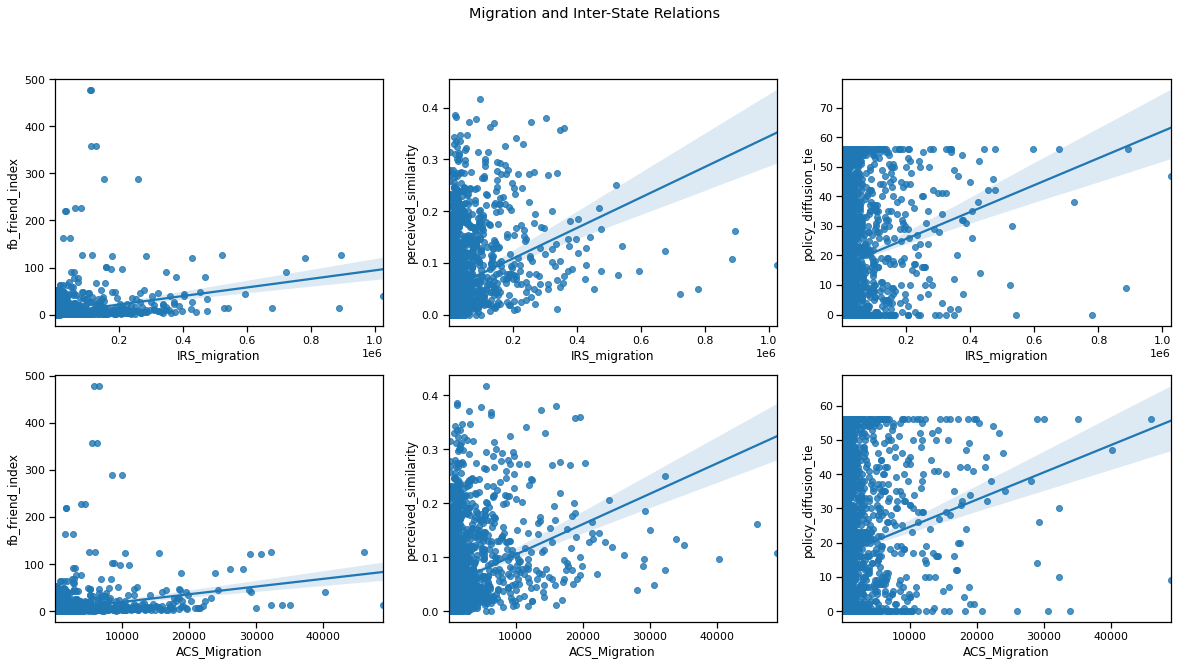

In [135]:
f25, axes = plt.subplots(2,3, figsize=(20,10))
f25.suptitle("Migration and Inter-State Relations")
sns.regplot(x="IRS_migration", y="fb_friend_index", data=sn, ax=axes[0,0])
sns.regplot(x="IRS_migration", y="perceived_similarity", data=sn, ax=axes[0,1])
sns.regplot(x="IRS_migration", y="policy_diffusion_tie", data=sn, ax=axes[0,2])
sns.regplot(x="ACS_Migration", y="fb_friend_index", data=sn, ax=axes[1,0])
sns.regplot(x="ACS_Migration", y="perceived_similarity", data=sn, ax=axes[1,1])
sns.regplot(x="ACS_Migration", y="policy_diffusion_tie", data=sn, ax=axes[1,2])

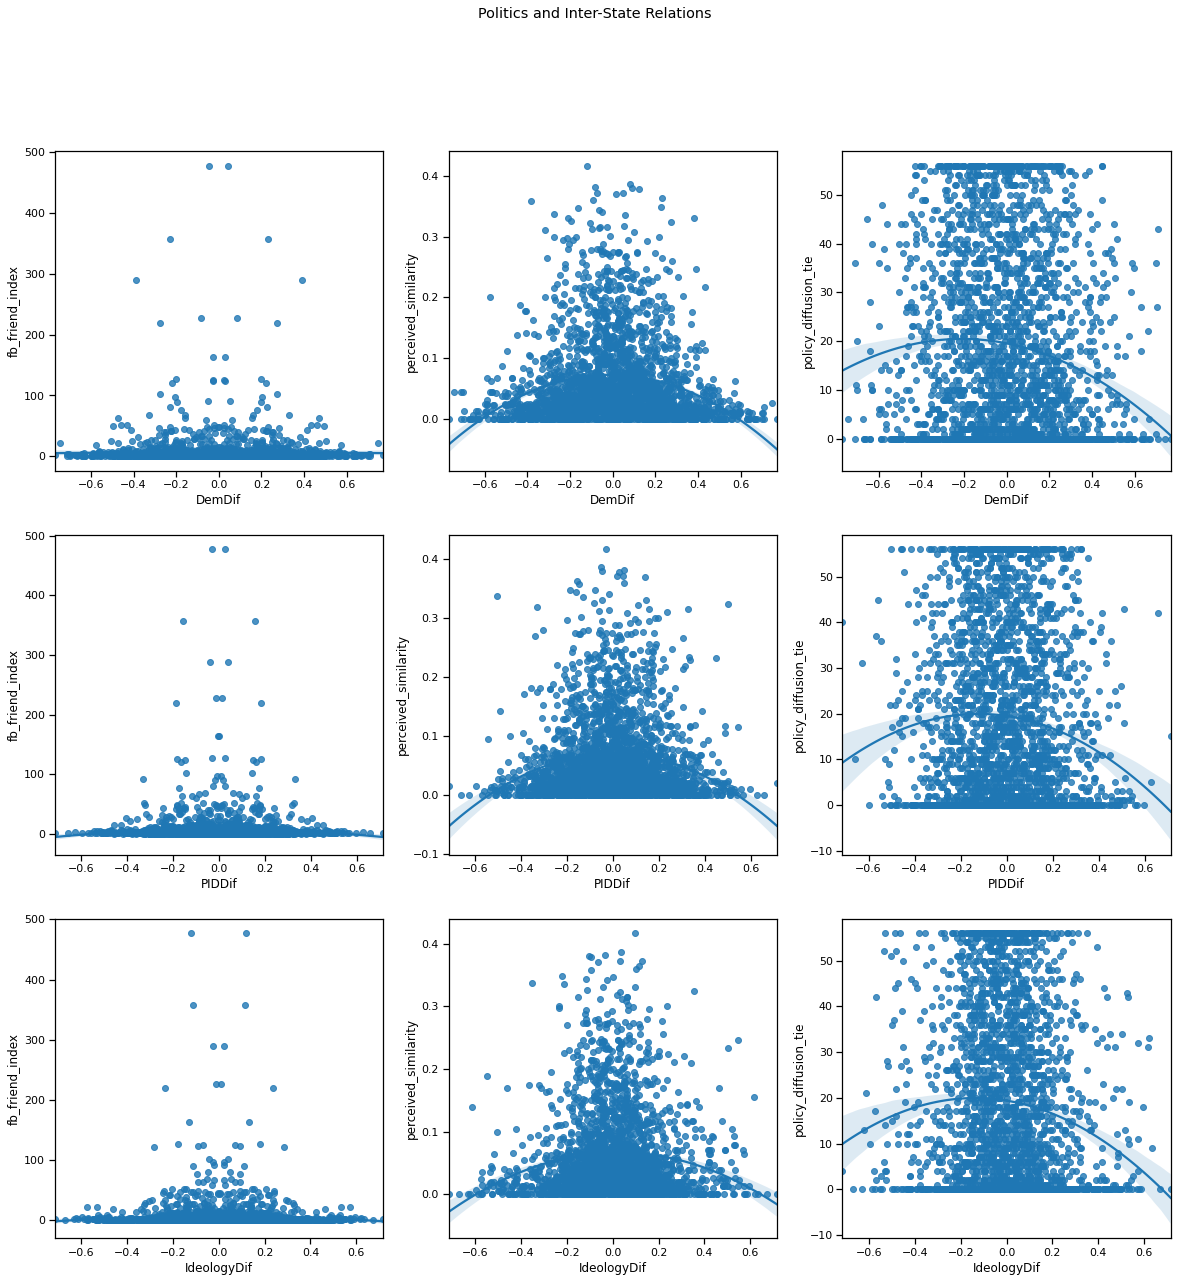

In [146]:
f31, axes = plt.subplots(3,3, figsize=(20,20))
f31.suptitle("Politics and Inter-State Relations")
sns.regplot(x="DemDif", y="fb_friend_index", data=sn, ax=axes[0,0], order=2)
sns.regplot(x="DemDif", y="perceived_similarity", data=sn, ax=axes[0,1], order=2)
sns.regplot(x="DemDif", y="policy_diffusion_tie", data=sn, ax=axes[0,2], order=2)
sns.regplot(x="PIDDif", y="fb_friend_index", data=sn, ax=axes[1,0], order=2)
sns.regplot(x="PIDDif", y="perceived_similarity", data=sn, ax=axes[1,1], order=2)
sns.regplot(x="PIDDif", y="policy_diffusion_tie", data=sn, ax=axes[1,2], order=2)
sns.regplot(x="IdeologyDif", y="fb_friend_index", data=sn, ax=axes[2,0], order=2)
sns.regplot(x="IdeologyDif", y="perceived_similarity", data=sn, ax=axes[2,1], order=2)
sns.regplot(x="IdeologyDif", y="policy_diffusion_tie", data=sn, ax=axes[2,2], order=2)

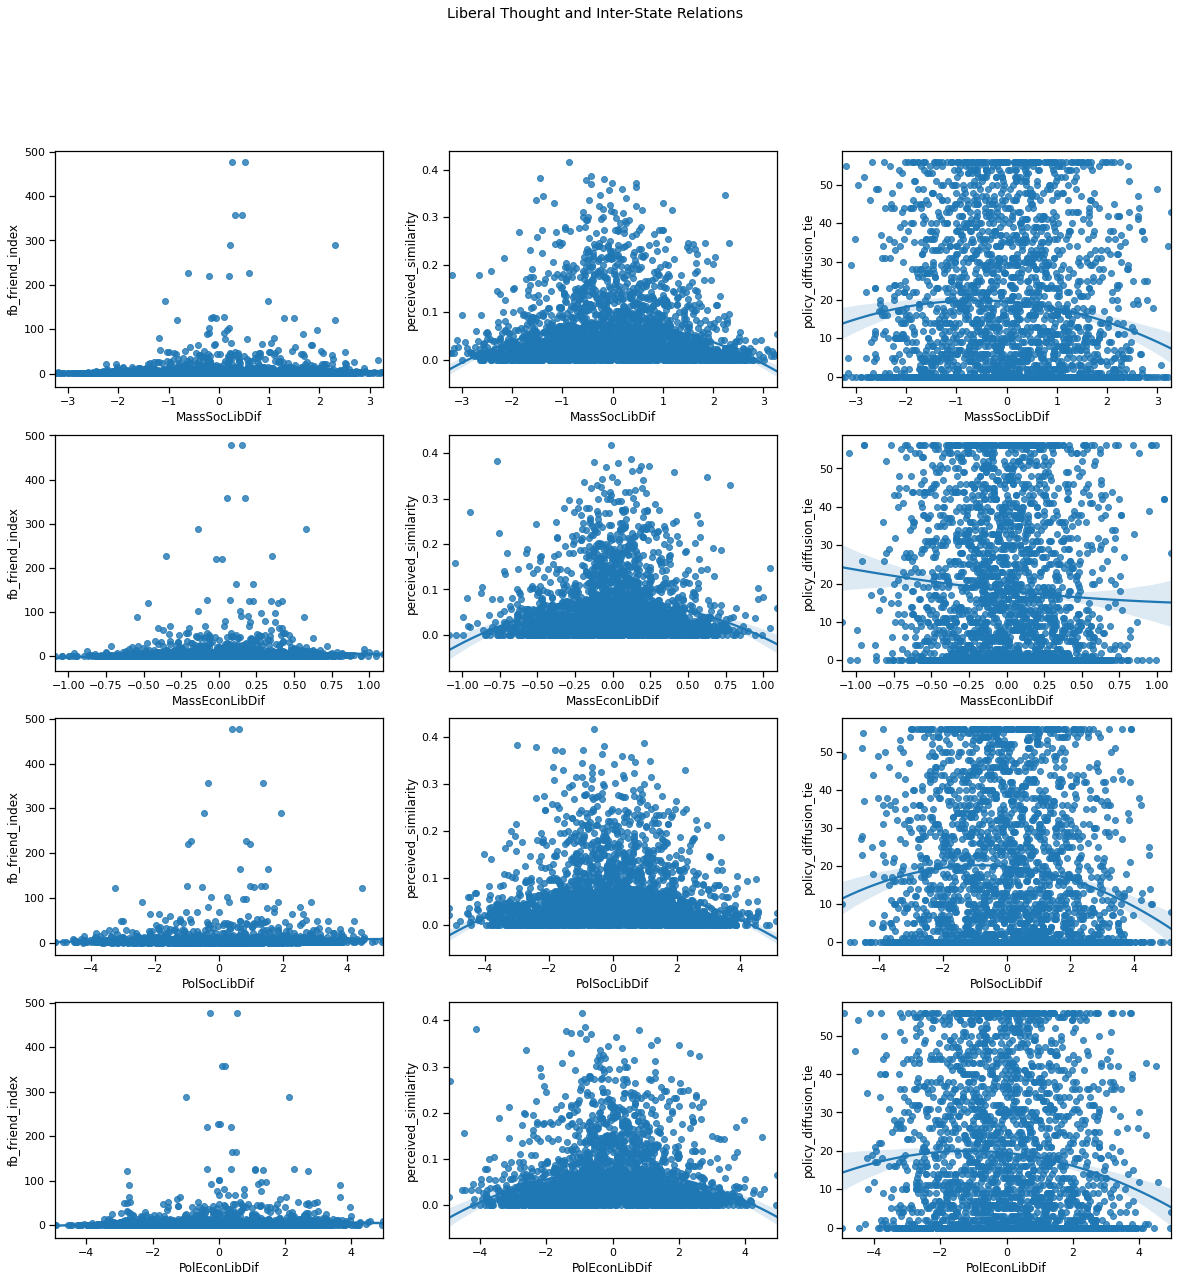

In [147]:
f32, axes = plt.subplots(4,3, figsize=(20,20))
f32.suptitle("Liberal Thought and Inter-State Relations")
sns.regplot(x="MassSocLibDif", y="fb_friend_index", data=sn, ax=axes[0,0], order=2)
sns.regplot(x="MassSocLibDif", y="perceived_similarity", data=sn, ax=axes[0,1], order=2)
sns.regplot(x="MassSocLibDif", y="policy_diffusion_tie", data=sn, ax=axes[0,2], order=2)
sns.regplot(x="MassEconLibDif", y="fb_friend_index", data=sn, ax=axes[1,0], order=2)
sns.regplot(x="MassEconLibDif", y="perceived_similarity", data=sn, ax=axes[1,1], order=2)
sns.regplot(x="MassEconLibDif", y="policy_diffusion_tie", data=sn, ax=axes[1,2], order=2)
sns.regplot(x="PolSocLibDif", y="fb_friend_index", data=sn, ax=axes[2,0], order=2)
sns.regplot(x="PolSocLibDif", y="perceived_similarity", data=sn, ax=axes[2,1], order=2)
sns.regplot(x="PolSocLibDif", y="policy_diffusion_tie", data=sn, ax=axes[2,2], order=2)
sns.regplot(x="PolEconLibDif", y="fb_friend_index", data=sn, ax=axes[3,0], order=2)
sns.regplot(x="PolEconLibDif", y="perceived_similarity", data=sn, ax=axes[3,1], order=2)
sns.regplot(x="PolEconLibDif", y="policy_diffusion_tie", data=sn, ax=axes[3,2], order=2)

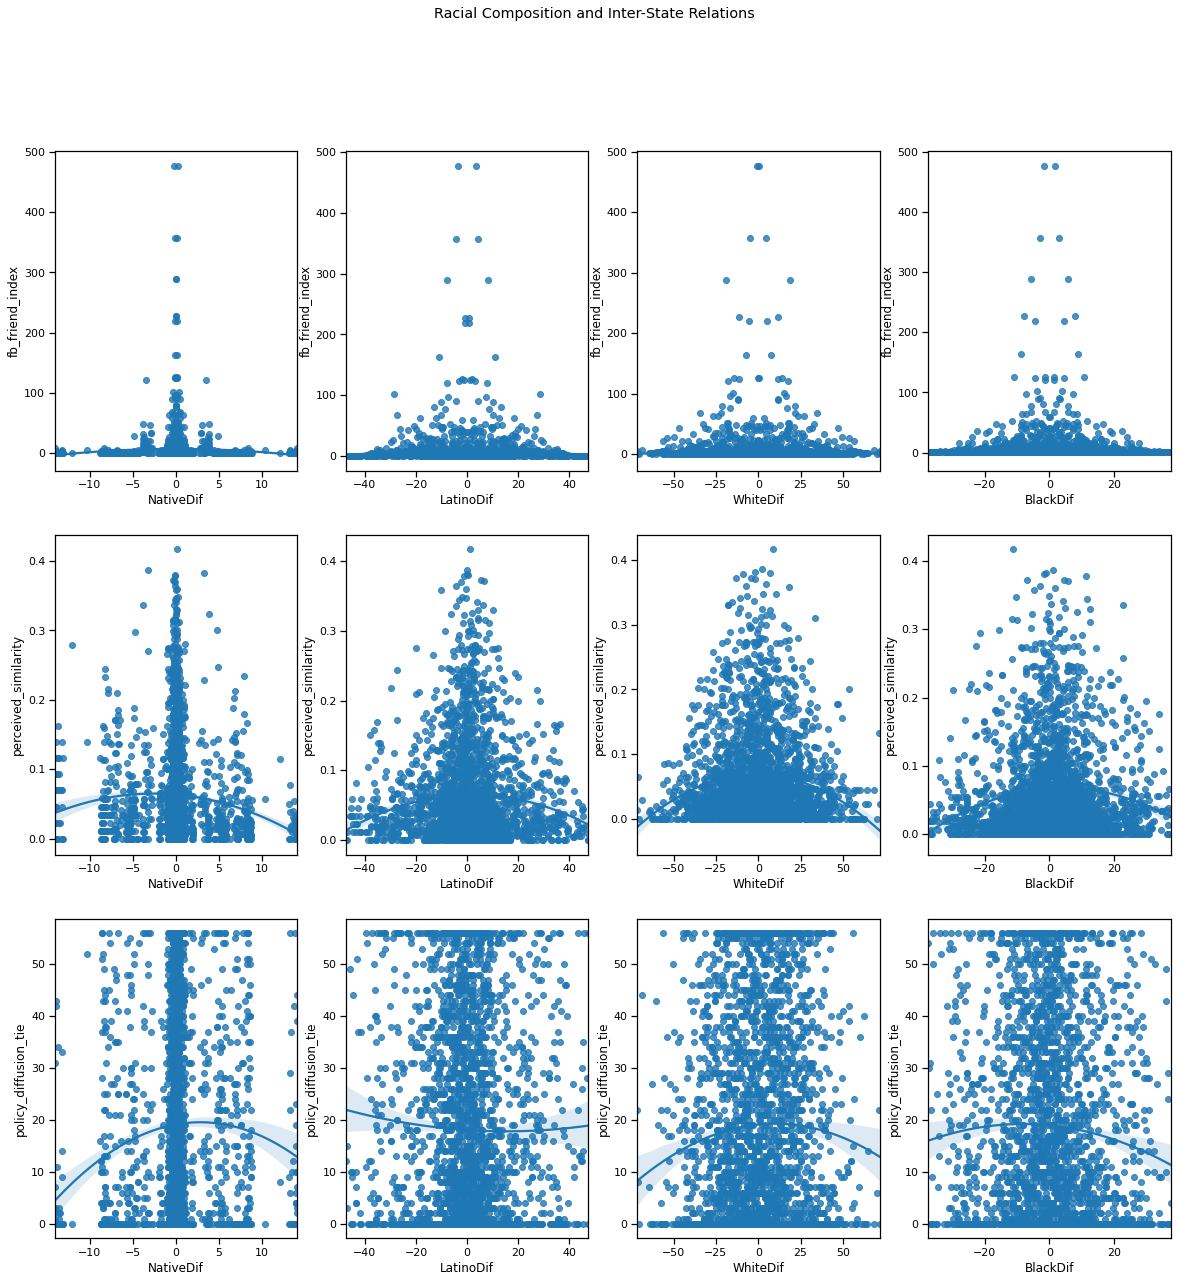

In [150]:
f41, axes = plt.subplots(3,4, figsize=(20,20))
f41.suptitle("Racial Composition and Inter-State Relations")
sns.regplot(x="NativeDif", y="fb_friend_index", data=sn, ax=axes[0,0], order=2)
sns.regplot(x="NativeDif", y="perceived_similarity", data=sn, ax=axes[1,0], order=2)
sns.regplot(x="NativeDif", y="policy_diffusion_tie", data=sn, ax=axes[2,0], order=2)
sns.regplot(x="LatinoDif", y="fb_friend_index", data=sn, ax=axes[0,1], order=2)
sns.regplot(x="LatinoDif", y="perceived_similarity", data=sn, ax=axes[1,1], order=2)
sns.regplot(x="LatinoDif", y="policy_diffusion_tie", data=sn, ax=axes[2,1], order=2)
sns.regplot(x="WhiteDif", y="fb_friend_index", data=sn, ax=axes[0,2], order=2)
sns.regplot(x="WhiteDif", y="perceived_similarity", data=sn, ax=axes[1,2], order=2)
sns.regplot(x="WhiteDif", y="policy_diffusion_tie", data=sn, ax=axes[2,2], order=2)
sns.regplot(x="BlackDif", y="fb_friend_index", data=sn, ax=axes[0,3], order=2)
sns.regplot(x="BlackDif", y="perceived_similarity", data=sn, ax=axes[1,3], order=2)
sns.regplot(x="BlackDif", y="policy_diffusion_tie", data=sn, ax=axes[2,3], order=2)

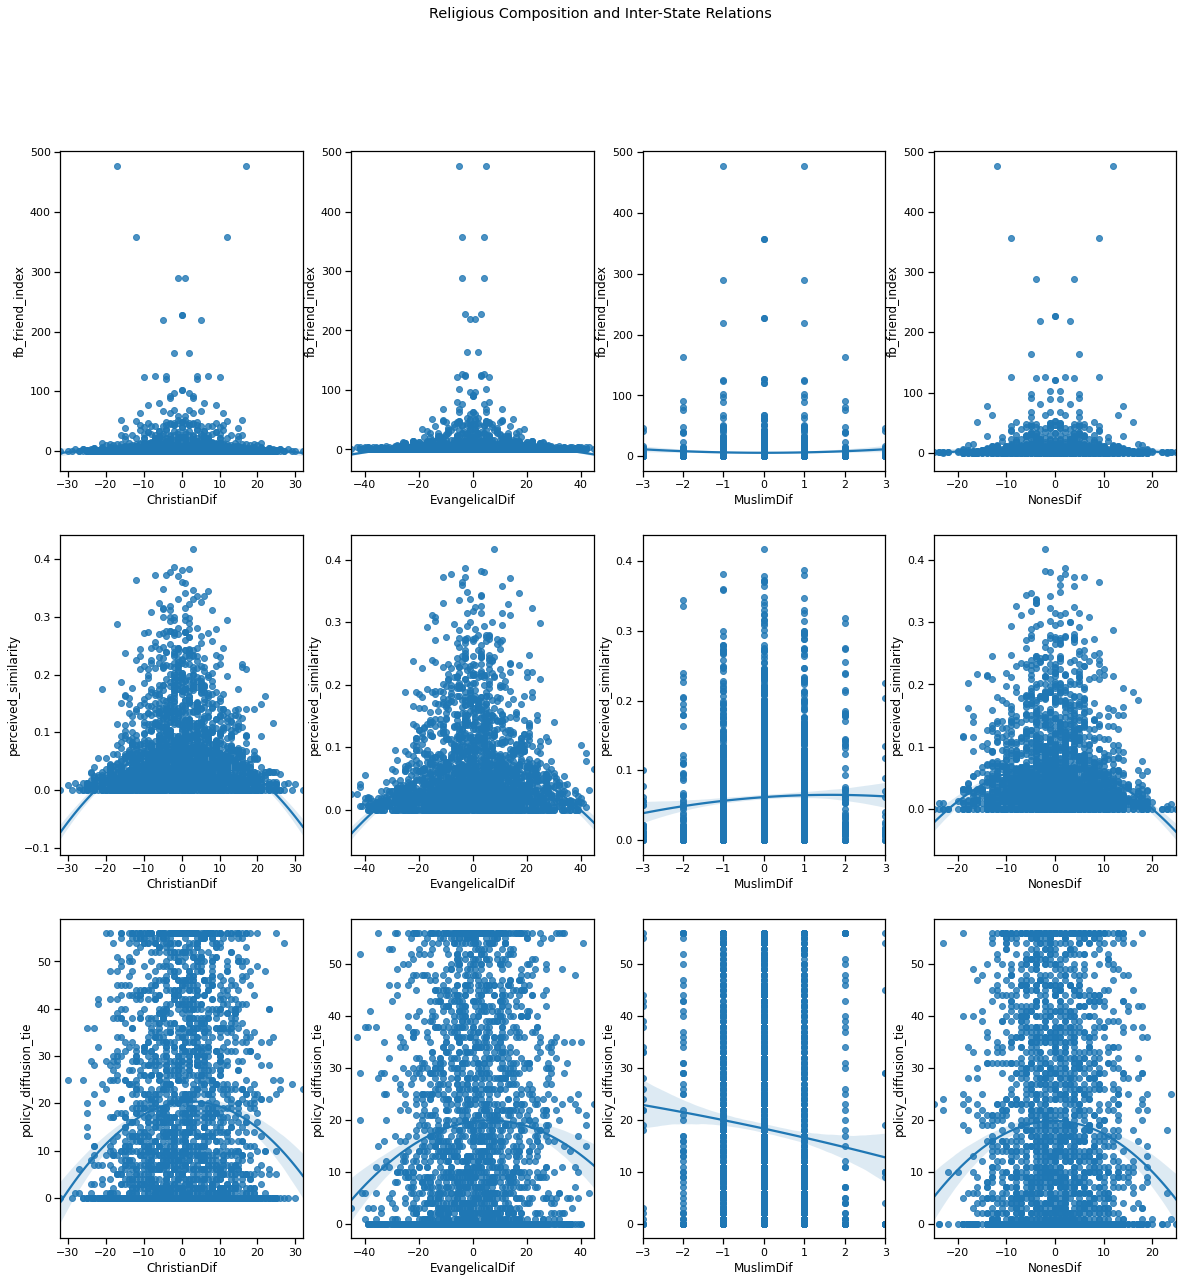

In [151]:
f42, axes = plt.subplots(3,4, figsize=(20,20))
f42.suptitle("Religious Composition and Inter-State Relations")
sns.regplot(x="ChristianDif", y="fb_friend_index", data=sn, ax=axes[0,0], order=2)
sns.regplot(x="ChristianDif", y="perceived_similarity", data=sn, ax=axes[1,0], order=2)
sns.regplot(x="ChristianDif", y="policy_diffusion_tie", data=sn, ax=axes[2,0], order=2)
sns.regplot(x="EvangelicalDif", y="fb_friend_index", data=sn, ax=axes[0,1], order=2)
sns.regplot(x="EvangelicalDif", y="perceived_similarity", data=sn, ax=axes[1,1], order=2)
sns.regplot(x="EvangelicalDif", y="policy_diffusion_tie", data=sn, ax=axes[2,1], order=2)
sns.regplot(x="MuslimDif", y="fb_friend_index", data=sn, ax=axes[0,2], order=2)
sns.regplot(x="MuslimDif", y="perceived_similarity", data=sn, ax=axes[1,2], order=2)
sns.regplot(x="MuslimDif", y="policy_diffusion_tie", data=sn, ax=axes[2,2], order=2)
sns.regplot(x="NonesDif", y="fb_friend_index", data=sn, ax=axes[0,3], order=2)
sns.regplot(x="NonesDif", y="perceived_similarity", data=sn, ax=axes[1,3], order=2)
sns.regplot(x="NonesDif", y="policy_diffusion_tie", data=sn, ax=axes[2,3], order=2)

In [ ]:
ChristianDif                  0
EvangelicalDif                0
MainlineDif                   0
BPDif                         0
CatholicDif                   0
MormonDif                     0
JewishDif                     0
MuslimDif                     0
BuddhistDif                   0
HinduDif                      0
NonesDif                      0
NPDif                         0
ReligiosityDif                0

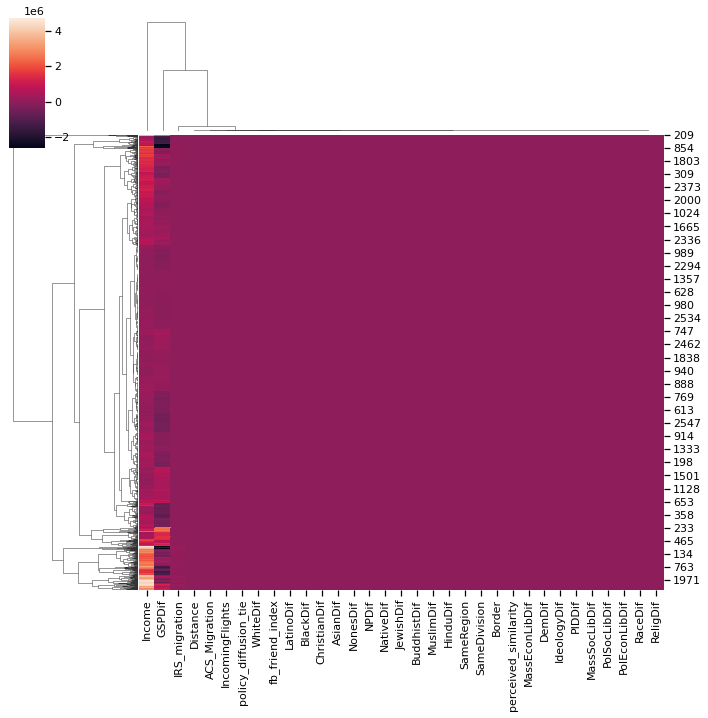

In [154]:
sns.clustermap(sn[sn["Income"]<=sn["Income"].quantile(.95)]["SameRegion SameDivision Border Distance ACS_Migration IncomingFlights IRS_migration Income GSPDif DemDif IdeologyDif PIDDif policy_diffusion_tie MassSocLibDif MassEconLibDif PolSocLibDif PolEconLibDif perceived_similarity fb_friend_index RaceDif LatinoDif WhiteDif BlackDif AsianDif NativeDif ReligDif ChristianDif JewishDif MuslimDif BuddhistDif HinduDif NonesDif NPDif".split()])

Last Line Update 2